In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats

In [19]:
df = sns.load_dataset('iris')

In [20]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<Axes: xlabel='sepal_length', ylabel='Density'>

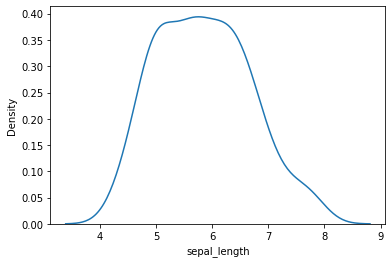

In [21]:
sns.kdeplot(x = 'sepal_length', data = df)

## Manually

In [22]:
quantiles = []
data = sorted(df['sepal_length'].tolist())
for i in range(1 , 101):
    quantiles.append(np.percentile(data , i))

In [23]:
samples = np.random.normal(loc = 0 , scale = 1 , size = 1000)

In [24]:
x_quant = []
data = sorted(samples.tolist())
for i in range(1 , 101):
    x_quant.append(np.percentile(data , i))

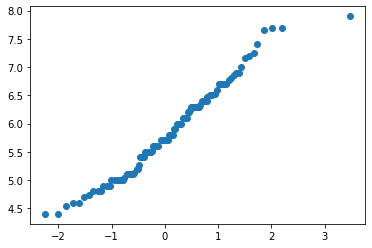

In [25]:
plt.scatter(x = x_quant , y  = quantiles)

## Using statsmodel

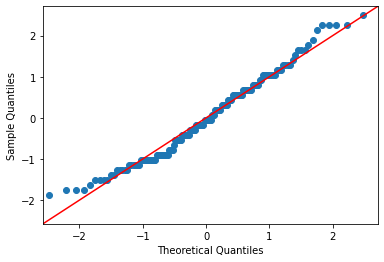

In [26]:
fig = sm.qqplot(df['sepal_length'] , line = "45" , fit = True)

In [27]:
# checking for the uniform distribution
x = np.random.uniform(low = 0 , high = 1 , size = 1000) #our original data

(array([108.,  91.,  97., 108., 107.,  84., 103., 118.,  85.,  99.]),
 array([8.00990669e-04, 1.00571731e-01, 2.00342471e-01, 3.00113210e-01,
        3.99883950e-01, 4.99654690e-01, 5.99425430e-01, 6.99196170e-01,
        7.98966910e-01, 8.98737650e-01, 9.98508390e-01]),
 <BarContainer object of 10 artists>)

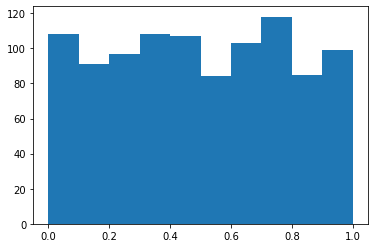

In [28]:
plt.hist(x)

In [31]:
#fitting uniform distribution to our data
params = stats.uniform.fit(x)

In [37]:
dist = stats.uniform(loc= params[0] ,scale =  params[1])

In [38]:
dist

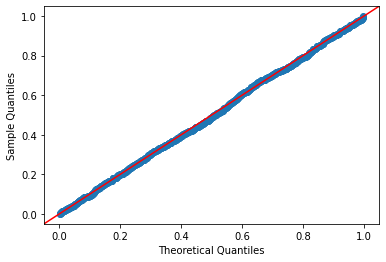

In [39]:
fig = sm.qqplot(x , dist = dist , line = "45")